In [1]:
#This project is to demonstrate the portfolio optimization


In [2]:
# Here required libraries are to be imported 
import pandas as pd # This is to import pandas
import numpy as np  # This will import numpy
import seaborn as sns # This will import seaborn for data visualization
import pandas_datareader as pdr # This will import pandas data reader package which allows to create realtime dataframes from internet 
import matplotlib.pyplot as plt # This willimport matplotlib

In [3]:
# Here a start and end dates are been entered such that the data is collected between those dates
startdate = '2021-11-06'
enddate= '2022-11-06'

# Here the codes for the stocks are provided as a list here the sampel is taken for 5 stocks
stock_list = ['TCS','AMD','AAPL','ORCL']

#Now here an empty dictionary is created to store the stock details collected from website
stocks = {}

# Here a loop os created for the each stock in the stock list and return the Adj close
for i_stock in stock_list:
    stocks[i_stock]=pdr.DataReader(i_stock,'yahoo',startdate,enddate)[['Adj Close']]
    

In [4]:
stocks['AMD'].head()

,Adj Close
Date,
2021-11-05,136.339996
2021-11-08,150.160004
2021-11-09,148.919998
2021-11-10,139.869995
2021-11-11,146.009995


In [5]:
# Now here the adjusted close is normalised with the every first day data
for stock_name,stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close']
    stock_data['Normalized return'] = stock_data['Adj Close']/first_adj_close  

In [6]:
stocks['AMD'].head()

,Adj Close,Normalized return
Date,,
2021-11-05,136.339996,1.000000
2021-11-08,150.160004,1.101364
2021-11-09,148.919998,1.092269
2021-11-10,139.869995,1.025891
2021-11-11,146.009995,1.070926


In [7]:
# Now here after the normalization, allocation is created here for each of the stock
for stock_name,stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized return'] * 0.25
''' Here the reason to multiply with a value of 0.25 is because there are 4 stocks in the portfolio and an 
equal weightage is allocated for each stock'''

' Here the reason to multiply with a value of 0.25 is because there are 4 stocks in the portfolio and an \nequal weightage is allocated for each stock'

In [8]:
stocks['AAPL'].head()

,Adj Close,Normalized return,Allocation
Date,,,
2021-11-05,150.407059,1.000000,0.250000
2021-11-08,149.571915,0.994447,0.248612
2021-11-09,149.939774,0.996893,0.249223
2021-11-10,147.066467,0.977790,0.244447
2021-11-11,147.016739,0.977459,0.244365


In [21]:
''' Now here an allocated money values is created such that the amount allocated to that particular stock in 
the portfolio is obtained'''
for stock_name,stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000
    # Here it is multiplied with 10000 because its the total amount of portfolio value

In [22]:
stocks['AAPL'].head()

,Adj Close,Normalized return,Allocation,Amount Allocated,Position Value
Date,,,,,
2021-11-05,150.407059,1.000000,0.250000,2500.000000,2500.000000
2021-11-08,149.571915,0.994447,0.248612,2486.118603,2486.118603
2021-11-09,149.939774,0.996893,0.249223,2492.232992,2492.232992
2021-11-10,147.066467,0.977790,0.244447,2444.474158,2444.474158
2021-11-11,147.016739,0.977459,0.244365,2443.647595,2443.647595


In [32]:
# TO visualize the value of the portfolio, a new positional values have to be created using a dictionary
#position_values = {}

#for stock_name,stock_data in stocks.items():
 #   position_values[stock_name] = stock_data['position_values']
    
position_values = {}
for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [34]:
stocks['ORCL'].head()

,Adj Close,Normalized return,Allocation,Amount Allocated,Position Value
Date,,,,,
2021-11-05,93.330627,1.000000,0.250000,2500.000000,2500.000000
2021-11-08,93.517380,1.002001,0.250500,2505.002439,2505.002439
2021-11-09,92.976761,0.996208,0.249052,2490.521156,2490.521156
2021-11-10,92.229721,0.988204,0.247051,2470.510582,2470.510582
2021-11-11,92.436157,0.990416,0.247604,2476.040282,2476.040282


In [36]:
position_values ={}
for stock_name,stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [38]:
position_values = pd.DataFrame(data=position_values)
position_values.head()

,TCS,AMD,AAPL,ORCL
Date,,,,
2021-11-05,2500.000000,2500.000000,2500.000000,2500.000000
2021-11-08,2492.700737,2753.410732,2486.118603,2505.002439
2021-11-09,2483.576614,2730.673356,2492.232992,2490.521156
2021-11-10,2432.481772,2564.727866,2444.474158,2470.510582
2021-11-11,2405.109578,2677.314039,2443.647595,2476.040282


In [39]:
position_values['Total'] = position_values.sum(axis=1)

In [40]:
position_values.head()

,TCS,AMD,AAPL,ORCL,Total
Date,,,,,
2021-11-05,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2021-11-08,2492.700737,2753.410732,2486.118603,2505.002439,10237.232511
2021-11-09,2483.576614,2730.673356,2492.232992,2490.521156,10197.004118
2021-11-10,2432.481772,2564.727866,2444.474158,2470.510582,9912.194377
2021-11-11,2405.109578,2677.314039,2443.647595,2476.040282,10002.111493


Text(0.5, 0, 'Time in years')

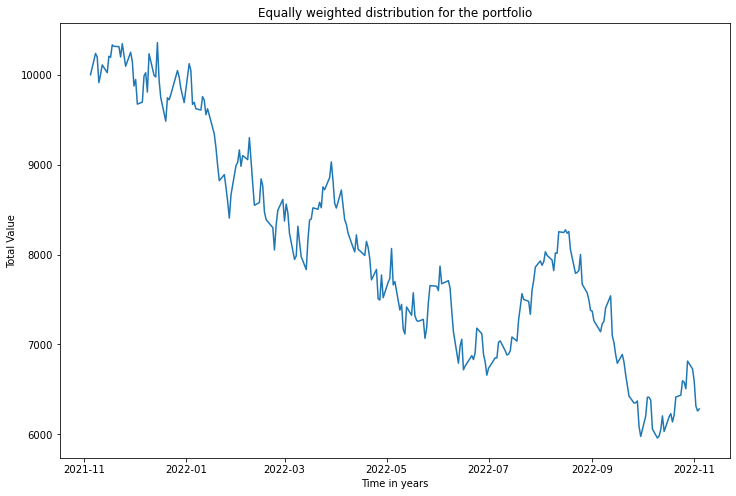

In [43]:
# here onwards the visualization things will start 
plt.figure(figsize=(12,8))
plt.plot(position_values['Total'])
plt.title('Equally weighted distribution for the portfolio')
plt.ylabel('Total Value');
plt.xlabel('Time in years')

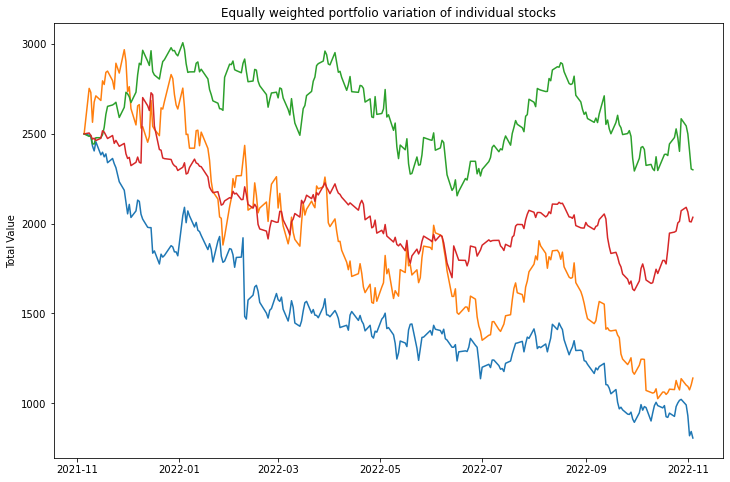

In [46]:
# Now the plot for all the stocks in portfolio
plt.figure(figsize=(12,8))
plt.plot(position_values.iloc[:,0:4])
plt.title('Equally weighted portfolio variation of individual stocks')
plt.ylabel('Total Value');

###  Now here we start calculating some quantative data analysis for the portfolio and they include
* Cumulative Return
* Mean Daily return
* Standard Deviation Daily Return
* Sharpe Ratio
* Annualized Sharpe Ratio

In [49]:
# Now this cell is to calculate the cumulative percentage of profit or loss of the portfolio
end_value = position_values['Total'][-1]
start_value= position_values['Total'][0]

#calculate the cumulative return for overall portfolio
cumulative_return = end_value/ start_value -1

print(str(round(cumulative_return*100,2)),'%')

-37.17 %


In [51]:
# Now to compute daily percentage change there is a function challed pct_change()
# So to compute the percentage change
position_values ['Daily Return'] = position_values['Total'].pct_change()
position_values.head()

,TCS,AMD,AAPL,ORCL,Total,Daily Return
Date,,,,,,
2021-11-05,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2021-11-08,2492.700737,2753.410732,2486.118603,2505.002439,10237.232511,0.023723
2021-11-09,2483.576614,2730.673356,2492.232992,2490.521156,10197.004118,-0.003930
2021-11-10,2432.481772,2564.727866,2444.474158,2470.510582,9912.194377,-0.027931
2021-11-11,2405.109578,2677.314039,2443.647595,2476.040282,10002.111493,0.009071


In [54]:
# To calculate the mean of the daily return
mean_D_R = position_values['Daily Return'].mean()
print('The mean of the daily return is :', str(round(mean_D_R,4)))

The mean of the daily return is : -0.0016


In [55]:
std = position_values['Daily Return'].std()
print('The mean of the daily return is :', str(round(std,4)))

The mean of the daily return is : 0.0219


## Sharpe ratio Calculation:
                          Now here a shapre ratio is calculated, to model for  the returns based on the adjustment of risk.
sharpe_ratio = mean_D_R/std                          

In [56]:
sharpe_ratio = mean_D_R/std                          

In [57]:
sharpe_ratio

-0.07370896446306009

In [58]:
#Sharpe ratio per annum is
sharpe_ratio_annualized = sharpe_ratio * 252**0.5
sharpe_ratio_annualized

-1.1700935361921274

In [59]:
# now here a scenario is prepared to optimize the portfolio weighting

# Initially create a dictionary 
stock_adj_close ={}

for stock_name,stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [60]:
# Convert the stock_adj_close dictionary to dataframe
stock_adj_close = pd.DataFrame(data=stock_adj_close)

In [62]:
stock_adj_close.head()

,TCS,AMD,AAPL,ORCL
Date,,,,
2021-11-05,13.70,136.339996,150.407059,93.330627
2021-11-08,13.66,150.160004,149.571915,93.517380
2021-11-09,13.61,148.919998,149.939774,92.976761
2021-11-10,13.33,139.869995,147.066467,92.229721
2021-11-11,13.18,146.009995,147.016739,92.436157


In [63]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,TCS,AMD,AAPL,ORCL
Date,,,,
2021-11-05,NaN,NaN,NaN,NaN
2021-11-08,-0.002920,0.101364,-0.005553,0.002001
2021-11-09,-0.003660,-0.008258,0.002459,-0.005781
2021-11-10,-0.020573,-0.060771,-0.019163,-0.008035
2021-11-11,-0.011253,0.043898,-0.000338,0.002238


In [84]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [86]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [87]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [89]:
print("The first combination is :",weights_array[0])

The first combination is : [0.26728964 0.34364796 0.14116943 0.24789297]


In [90]:
print("The sharpe ration of the first portfolio is : ", sharpe_array[1])

The sharpe ration of the first portfolio is :  -1.522210246006707


In [91]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

-0.18775979181648592

In [92]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

1252

In [93]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['TCS', 'AMD', 'AAPL', 'ORCL']
[0.01969199 0.01438289 0.88220878 0.08371633]


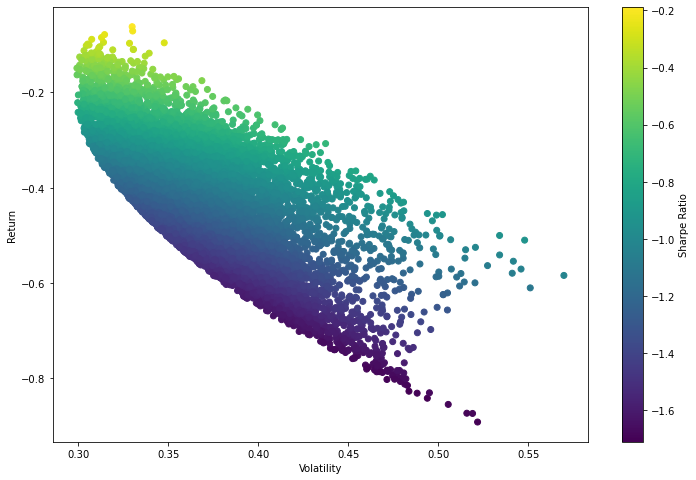

In [94]:
# To visualize the portfolio 
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

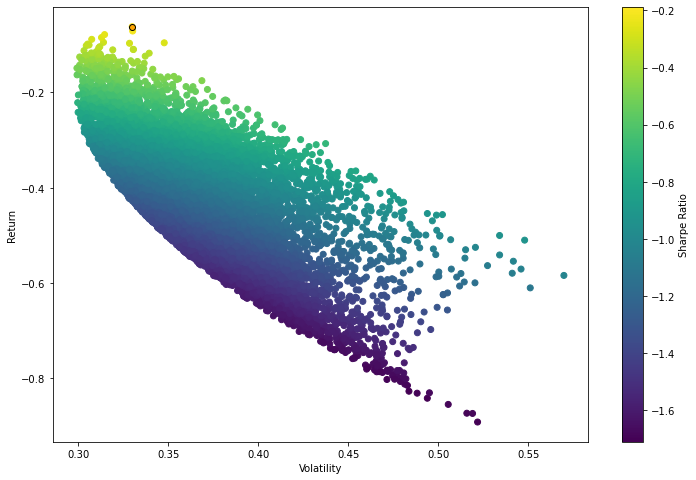

In [95]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');

In [105]:
n=np.arange(1,15,2)
n

array([ 1,  3,  5,  7,  9, 11, 13])

In [115]:
import pandas as pd
df1 = pd.DataFrame({"A":[5,6],
                    "A":[1,2]},
                    index =["A","A"])

In [118]:
sr=pd.Series([5,1],index=["A","A"])

In [119]:
sr

A    5
A    1
dtype: int64